In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [6]:
#############################################################
##                                                         ##
##           PROBLEM 4: SUSAN CORNER DETECTION             ##
##                                                         ##
#############################################################

## SUSAN 

below program will implement susan corner detector as below steps <br/>
before susan corner detection noise is removed from the image using below steps<br/>
1)cv2.fastNlMeansDenoising is used to remove noise<br/>
2)ndimage.gaussian_filter(I1_noiseremoved, 3) is used to blur the image<br/>
3)image is sharpened using equation sharpened = blurred_l + alpha * (blurred_l - filter_blurred_l)<br/>

<br/>

1)Image is convolved with circular mask of size 7*7<br/>
2) with in each region The number of pixels of USAN  is computed as by formula sigma(epower-(Ir-I(ro))/t)power6<br/>
3)    R(r0) = g - n(r0) for n(r0) <=g<br/>
              0         for n(r0) >g<br/>
g is half of n max value of a mask M<br/>
4) Non maxima supression step is applied in the last and corners are plotted on the image<br/>
<br/>
comments:<br/>
although most amount of noise has been removed it also suffers<br/>
from the smoothness issue hence more corners are spotted by the susan detector but on overall case corner<br/> detection is impreved after the pre-procesing the image with noise removal steps')<br/>

In [7]:
from PIL import Image
#from pylab import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.ndimage import filters
from scipy import misc
from scipy import  signal
import math
from numpy.linalg import inv
import copy as cp
from numpy.linalg import inv
from scipy import interpolate
from scipy import ndimage

import cv2

In [8]:
image_name1 = 'susan_input2.png'
image_name2 = 'susan_input2.png'
i1 = Image.open(image_name1).convert('L')
i2 = Image.open(image_name2).convert('L')
plt.figure(1)
plt.imshow(i1)

In [9]:
I2 = np.array(i2)
I1 = np.zeros(I2.shape)
circular_filter = np.ones((7,7))

In [10]:
#set boudnaries to zero
circular_filter[0][0] = 0
circular_filter[0][1] = 0
circular_filter[1][0] = 0

circular_filter[0][5] = 0
circular_filter[0][6] = 0
circular_filter[1][6] = 0


circular_filter[5][0] = 0
circular_filter[6][0] = 0
circular_filter[6][1] = 0

circular_filter[6][6] = 0
circular_filter[6][6] = 0
circular_filter[5][6] = 0

In [11]:
#concolve the image with circular filter to get the n(r) values of each pixel

R = np.zeros(I1.shape)
maskr = 3
maxN = 0
len1 = 2*maskr+1
threshold = 27

plt.gray()
#plt.figure(0)
plt.imshow(Image.fromarray(I2))

In [12]:
I1_noiseremoved = np.zeros(I2.shape)
I1_aftersmoothing = np.zeros(I2.shape)
I1_normalized = np.zeros(I1.shape)

In [13]:
I1_noiseremoved[:] = cv2.fastNlMeansDenoising(I2,None,40,7,21)

In [14]:
blurred_l = ndimage.gaussian_filter(I1_noiseremoved, 3)
filter_blurred_l = ndimage.gaussian_filter(blurred_l, 1)
alpha = 30
sharpened = blurred_l + alpha * (blurred_l - filter_blurred_l)

In [15]:
I1[:] = sharpened
#sharpeded image is saved
cv2.imwrite('sharpen.png',sharpened)

True

In [16]:
#susan corner detection steps starts
xmin = maskr
xmax = I1.shape[0]- maskr
ymin = maskr
ymax = I1.shape[1]- maskr

In [17]:
mask = np.zeros((7,7))
#apply circular mask on the image
for i in range(xmin,xmax):
    for j in range(ymin,ymax):
        mask[:] = I1[i-maskr:i+maskr+1,j-maskr:j+maskr+1]
        #run the criterion on the mask part of the image
        #find the comparison ouput in a circle mask
        len=2*maskr+1
        cen=maskr
        cenBri=mask[cen][cen]
        for c in range(0,len):
            for d in range(0,len):
                if ((c-cen)*(c-cen)+(d-cen)*(d-cen)<=maskr*maskr):
                    mask[c][d]=math.exp(-math.pow(((mask[c][d]-cenBri)/27),6))
                else:
                    #print(mask.shape)
                    #print c,d
                    mask[c][d]=0
        mask[maskr][maskr] = 0
        n = np.sum(mask)
        R[i][j] = n
        if maxN < n:
            maxN = n

print(maxN)

28.0


In [18]:
#threshold the R matrix based on the formula R[i][j] = g - R[i][j] if R[i][j]<=g  and R[i][j] = g - R[i][j] if R[i][j]>g
g = maxN/2
for i in range(xmin,xmax):
    for j in range(ymin,ymax):
        if(R[i][j] >=g):
            R[i][j] = 0
        else:
            R[i][j] = g - R[i][j]


print(np.sum(np.nonzero(R)))

2451697


In [19]:
R1 = ndimage.maximum_filter(R,5)

In [20]:
#apply non max supression on the resultant R
window = 5
xmin = int(math.floor(window/2))
xmax = int(I1.shape[0] - math.floor(window/2))
ymin = int(math.floor(window/2))
ymax = int(I1.shape[1] - math.floor(window/2))
rad = int(math.floor(window/2))

In [21]:
listx = []
listy = []
mask1 = np.zeros((window,window))

In [22]:
for i in range(xmin,xmax):
    for j in range(ymin,ymax):

        if R[i][j] == 0:
            continue
        mask1[:] = R[i-rad:i+rad+1,j-rad:j+rad+1]
        val = np.max(mask1)
        index= np.argmax(mask1)
        if index==12:
            listx.append(i)
            listy.append(j)

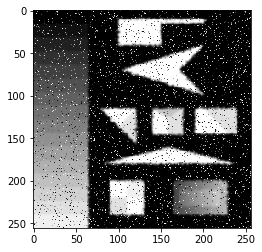

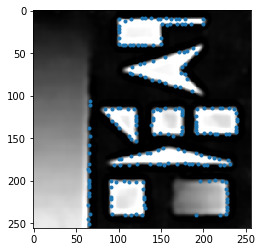

In [24]:
plt.figure(2)
plt.gray()
plt.imshow(Image.fromarray(sharpened))
plt.plot([p for p in listy],[p for p in listx],'.')
plt.show()

although most amount of noise has been removed it also suffers from the smoothness issue hence more corners are spotted by the susan detector but on overall case corner detection is impreved after the pre-procesing the image with noise removal steps